In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.
/Users/suzukishinji/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
valid_df = pd.read_csv('/Users/suzukishinji/kaggle/MINIST/test.csv')

In [2]:
train = pd.read_csv('/Users/suzukishinji/kaggle/MINIST/train.csv')

X_train = train.iloc[:, 1:].values
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_train = X_train/255

y_train = train['label'].values

In [3]:
def show(img):
    plt.imshow(img , cmap = 'gray', interpolation = 'none')

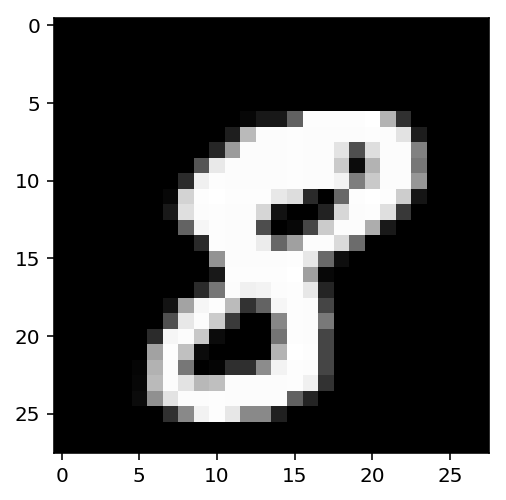

In [4]:
img = X_train[10]
show(img)

In [5]:
pd.DataFrame(img)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.992157,0.992157,1.000000,0.705882,0.188235,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.988235,0.988235,0.992157,0.988235,0.890196,0.113725,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.890196,0.309804,0.870588,0.988235,0.988235,0.505882,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.792157,0.043137,0.705882,0.988235,0.988235,0.466667,0.0,0.0,0.0,0.0


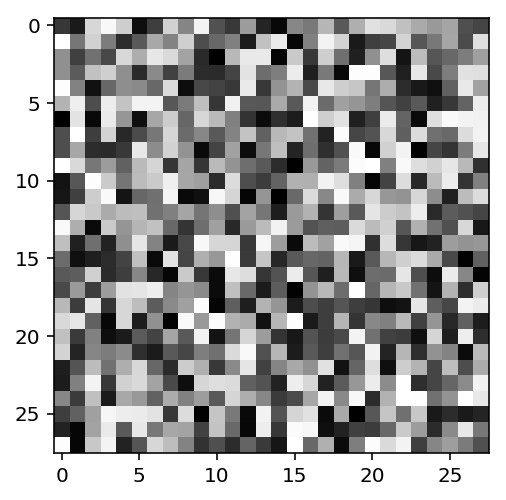

In [7]:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

show(rand_img)

In [9]:
rand_direction = np.random.rand(28, 28) 

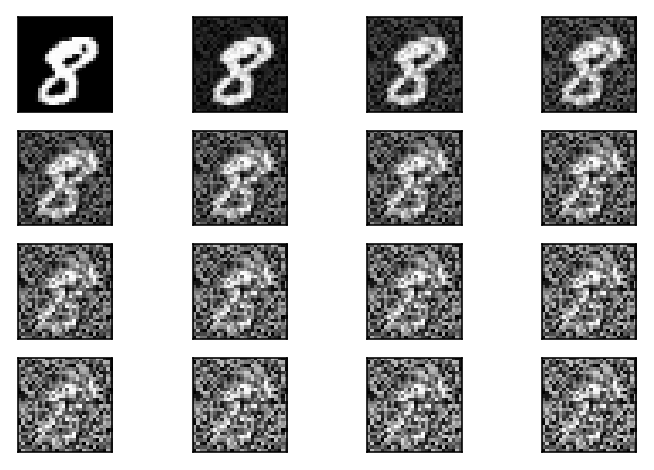

In [10]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    show(img + i/4*rand_direction)
    plt.xticks([])
    plt.yticks([])

In [11]:
X_flat = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
knn = NearestNeighbors(5000)
knn.fit(X_flat[:5000])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5000, p=2, radius=1.0)

In [12]:
distances, neighbors = knn.kneighbors(img.flatten().reshape(1, -1))
neighbors = neighbors[0]
distances = distances[0]

(array([    8.,    28.,   120.,   408.,   852.,  1346.,  1257.,   711.,
          218.,    51.]),
 array([  6.93865358,   7.66124204,   8.38383049,   9.10641895,
          9.8290074 ,  10.55159586,  11.27418432,  11.99677277,
         12.71936123,  13.44194968,  14.16453814]),
 <a list of 10 Patch objects>)

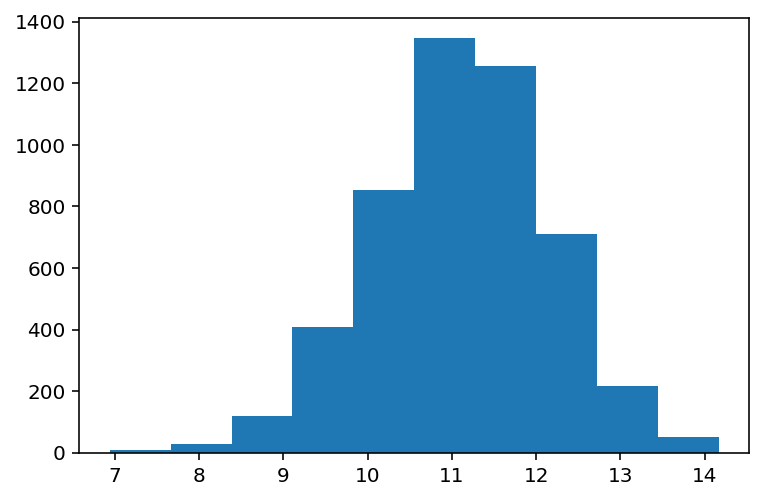

In [16]:
plt.hist(distances[1:])

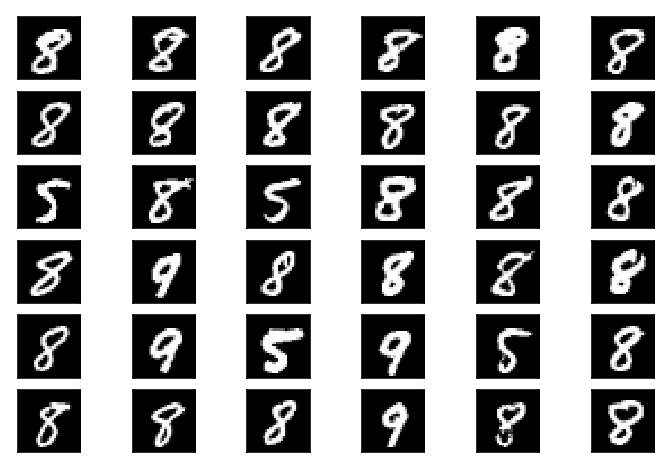

In [17]:
for digit_num, num in enumerate(neighbors[:36]):
    plt.subplot(6, 6, digit_num +1)
    grid_data = X_train[num]
    show(grid_data)
    plt.xticks([])
    plt.yticks([])

In [19]:
input_img = Input(shape = (784, ))

encoded = Dense(64, activation = 'relu')(input_img)

encoded = Dense(2)(encoded)

decoded = Dense(64, activation ='relu')(encoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input = input_img, output = decoded)

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [23]:
type(X_flat)

numpy.ndarray

In [24]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.fit(X_flat, X_flat, batch_size = 128, nb_epoch = 10, verbose = 3)

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [25]:
encoder = Model(input = input_img, output = encoded)

encoded_input = Input(shape = (2, ))
encoded_layer_1 = autoencoder.layers[-2]
encoded_layer_2 = autoencoder.layers[-1]

decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = Model(input = encoded_input, output = decoder)

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.
/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [26]:
import seaborn as sns

X_proj = encoder.predict(X_flat[:10000])
X_proj.shape

(10000, 2)

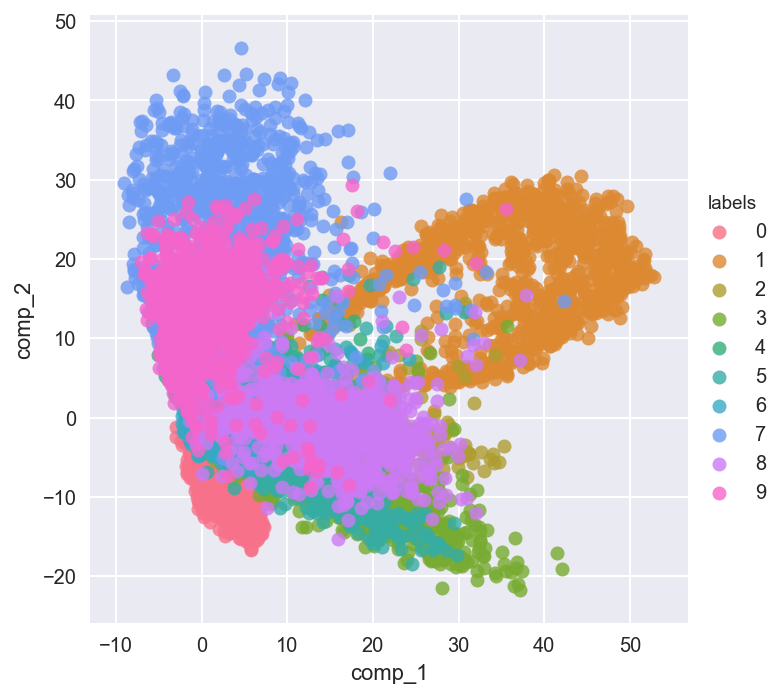

In [27]:
proj = pd.DataFrame(X_proj)
proj.columns = ['comp_1', 'comp_2']
proj['labels'] = y_train[:10000]
sns.lmplot('comp_1', 'comp_2', hue = 'labels', data= proj, fit_reg = False)

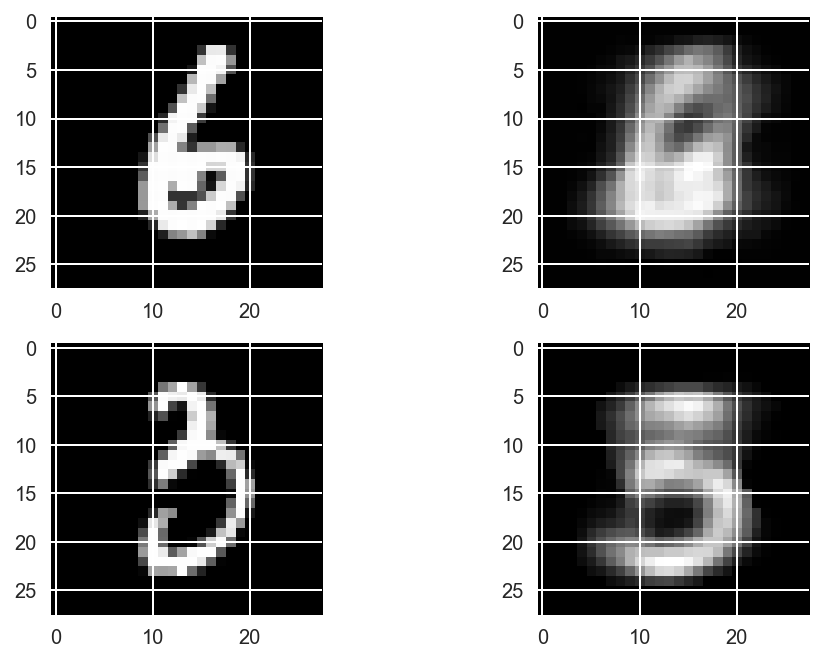

In [28]:
plt.subplot(2,2,1)
show(X_train[160])
plt.subplot(2,2,2)
show(autoencoder.predict(np.expand_dims(X_train[160].flatten(), 0)).reshape(28, 28))
plt.subplot(2,2,3)
show(X_train[150])
plt.subplot(2,2,4)
show(autoencoder.predict(np.expand_dims(X_train[150].flatten(), 0)).reshape(28,28))

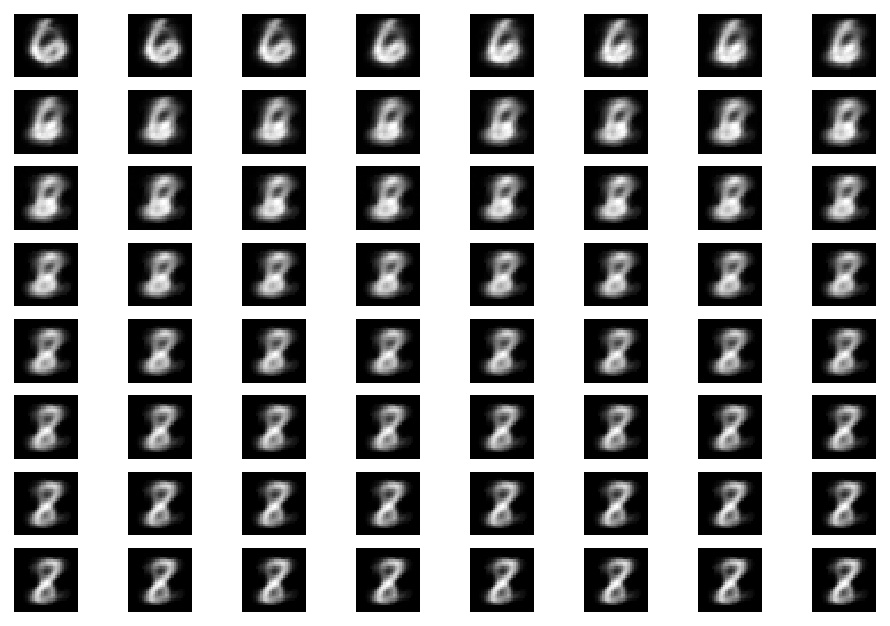

In [29]:
for i in range(64):
    plt.subplot(8, 8, i+1)
    pt = np.array([[i/3, 0]])
    show(decoder.predict(pt).reshape((28, 28)))
    plt.xticks([])
    plt.yticks([])

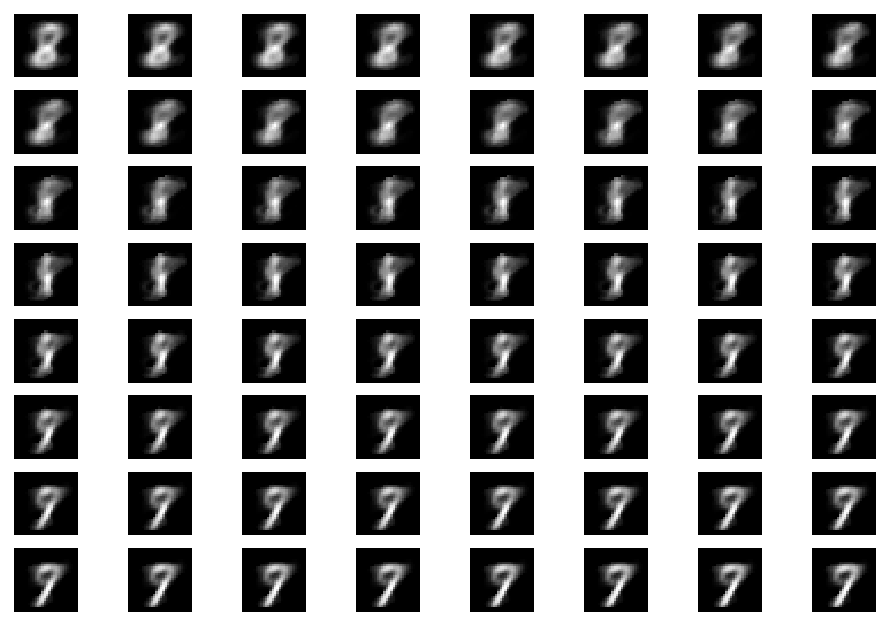

In [31]:
for i in range(64):
    plt.subplot(8, 8, i +1)
    pt = np.array([[10, i/3]])
    show(decoder.predict(pt).reshape((28, 28)))
    plt.xticks([])
    plt.yticks([])